# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
titanic_df = pd.read_csv('titanic_train.csv')

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# null값 처리하기
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # inplace=True를 해야 적용됨. 
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum()) 

데이터 세트 Null 값 개수  0


In [15]:
titanic_df.isnull() # null 값만 True로 return하고 나머지는 False로 return한다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
titanic_df.isnull().sum() # columns 별로 True 개수를 센다.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
titanic_df.isnull().sum().sum() # series 값들을 더 한다.

0

In [20]:
# Null 값을 처리했으면 다음은 object 데이터를 어떻게 처리할 지다.
# value_counts는 columns에 속한 클래스 별 개수를 보여준다.
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print()
print('Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print()
print('Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts()) 

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
# 위 데이터를 보니 Cabin 값은 앞 대문자 영어로 객실 등급을 구별한 것으로 보인다. 객실 번호까지 구별하는 것은 비효율로 보이므로 처리한다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # Cabin columns의 문자열을 [:1]까지만 사용함
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


### EDA 진행

In [22]:
# 성별 생존확률
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

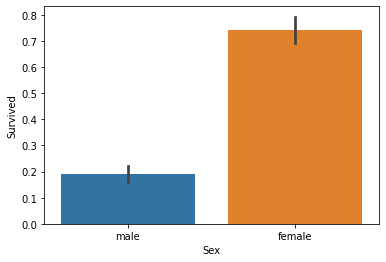

In [23]:
sns.barplot(x='Sex', y='Survived', data=titanic_df) # x축은 Sex고 y축은 Survived다

In [26]:
# 재산(객실 등급)별 생존 유무
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

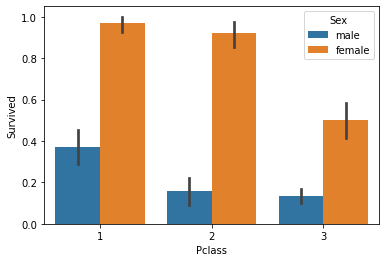

In [29]:
# 객실과 성별을 모두 고려하여 시각화
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue를 넣으면 columns의 클래스 갯수에 따른 비율을 보여준다.

In [30]:
# Age에 따른 생존 확률
# Age는 구간에 따라 대표 값으로 바꿔준다.

# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [33]:
# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식 위에서 생성한 get_category() 함수를 반환값으로 지정. 
# get_category(x)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

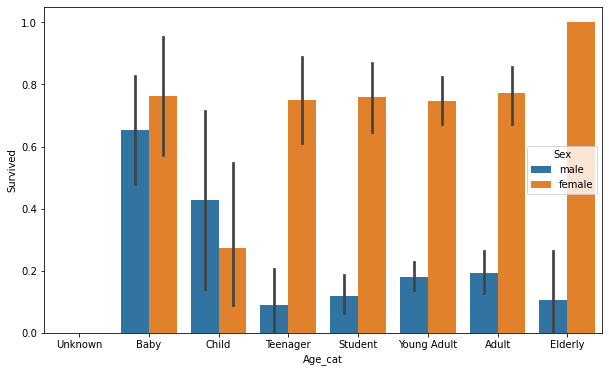

In [36]:
#  막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age_cat', # X축 설정
            y='Survived', # Y축 설정
            hue='Sex', # 비율로 나누어 볼 기준 설정
            data=titanic_df, # 사용 데이터
            order=group_names) # 보여주는 데이터 순서 설정

### 전처리

In [37]:
from sklearn import preprocessing

In [42]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked'] # feature 리스트
   
    for feature in features:
        le = preprocessing.LabelEncoder() # preprocessing의 LabelEncoder 클래스를 객체화
        le = le.fit(dataDF[feature]) # 데이터의 feature를 encoding함
        dataDF[feature] = le.transform(dataDF[feature]) # encoding한 데이터로 변환
    
    return dataDF

In [43]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [53]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# 위에서 진행한 전처리 내용들을 정리하여 함수로 재구성

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [50]:
# 머신러닝 알고리즘에 불필요한 속성 제거

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # axis=1은 열 방향으로 drop하라는 뜻, inplace는 실제 데이터에 적용함
    return df

In [47]:
# 레이블 인코딩 수행. object 데이터를 수치형 클래스로 바꿔줌

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder() # 클래스 객체화
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df

In [48]:
# 앞에서 설정한 데이터 전처리 함수 호출

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [54]:
# 데이터 분리 및 전처리 모두 진행

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived'] # titanic_df에서 Survived columns만 저장
X_titanic_df = titanic_df.drop('Survived', axis=1) # titanic_df에서 Survived  columns을 제거

X_titanic_df = transform_features(X_titanic_df) # 위에서 설정한 전처리 함수 실행

In [55]:
# 학습과 검증 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, # train data
                                                    y_titanic_df, # target
                                                    test_size=0.2, # 비율
                                                    random_state=1) # 고정 시드

In [56]:
#  ML 모델을 통해 학습과 클래스 예측

from sklearn.tree import DecisionTreeClassifier # 의사결정트리
from sklearn.ensemble import RandomForestClassifier # 앙상블의 랜덤 포레스트
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀, 분류 모델이다
from sklearn.metrics import accuracy_score

In [57]:
# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷 런 Classifier 클래스 생성

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [58]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정나무 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

의사결정나무 정확도: 0.7318


In [60]:
# 랜덤포래스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

랜덤포레스트 정확도: 0.7654


In [61]:
# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도: {0:0.4f}'.format(accuracy_score(y_test, lr_pred)))

로지스틱 회귀 정확도: 0.7989


C:\Users\Kyeul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 교차검증을 통한 결정트리 모델 평가

In [63]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds) # KFold 클래스 생성
    scores = []
    
    # KFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)): # kfold를 통해 데이터를 순차적으로 분리 하고 index로 반한
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index] # index에 해당하는 데이터만 추출
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        
        clf.fit(X_train, y_train) # 학습 진행
        predictions = clf.predict(X_test) # 학습한 모델로 test 데이터 예측
        accuracy = accuracy_score(y_test, predictions) # 정확도 계산
        scores.append(accuracy)
        
        print("교차 검증 {0} 정확도: {1: .4f}".format(iter_count, accuracy))
    
    # 5개 fold에서 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

In [64]:
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도:  0.7542
교차 검증 1 정확도:  0.7809
교차 검증 2 정확도:  0.7865
교차 검증 3 정확도:  0.7697
교차 검증 4 정확도:  0.8202
평균 정확도: 0.7823


In [66]:
# cross_val_score API 사용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, # 어떤 모델을 사용할 것인지
                         X_titanic_df, # 학습 데이터
                         y_titanic_df, # 타겟 데이터
                         cv=5) # fold 횟수

for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1: .4f}".format(iter_count, accuracy))
    
print("평균 정확도: {:.4f}".format(np.mean(scores)))

교차 검증 0 정확도:  0.7430
교차 검증 1 정확도:  0.7753
교차 검증 2 정확도:  0.7921
교차 검증 3 정확도:  0.7865
교차 검증 4 정확도:  0.8427
평균 정확도: 0.7879


In [68]:
scores, type(scores)

(array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663]),
 numpy.ndarray)

In [71]:
# GridSearchCV를 사용

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, # 사용할 모델
                         param_grid=parameters, # 탐색할 파라미터
                         scoring='accuracy', # metric
                         cv=5) # fold 횟수
grid_dclf.fit(X_train, y_train)
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_) # grid search 결과 최적의 파라미터
print('GridSearchCV 최고 정확도: {:.4f}'.format(grid_dclf.best_score_)) # 최적의 파라미터로 얻은 정확도

best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test) 
accuracy = accuracy_score(y_test, dpredictions)

print("테스트 세트에서의 DecisionTreeClassifier 정확도: {: .4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8343
테스트 세트에서의 DecisionTreeClassifier 정확도:  0.8045
